### Import Dependencies

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

### Ingesting and Investigating Data

In [170]:
df = pd.read_csv('tennis_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [5]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [72]:
df.describe().round(3)

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,...,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000,1721.000
mean,2013.647,0.598,0.681,0.262,0.480,0.466,97.105,0.369,112.003,102.918,...,0.174,0.342,197.650,0.716,0.473,0.599,7.877,9.279,234492.757,269.611
std,2.488,0.055,0.070,0.057,0.067,0.068,137.966,0.163,119.248,122.762,...,0.081,0.049,221.209,0.123,0.037,0.058,10.184,8.996,253053.694,277.342
min,2009.000,0.360,0.270,0.000,0.060,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.220,0.250,0.000,0.000,108.000,3.000
25%,2012.000,0.570,0.650,0.240,0.460,0.440,7.000,0.320,15.000,9.000,...,0.130,0.320,22.000,0.670,0.460,0.570,0.000,2.000,49311.000,83.000
50%,2014.000,0.600,0.690,0.270,0.490,0.480,34.000,0.380,55.000,41.000,...,0.180,0.350,86.000,0.750,0.480,0.610,3.000,5.000,125212.000,166.000
75%,2016.000,0.630,0.720,0.290,0.520,0.500,140.000,0.430,201.000,172.000,...,0.220,0.370,348.000,0.790,0.500,0.630,13.000,17.000,350075.000,333.000
max,2017.000,0.880,0.890,0.480,0.920,0.750,1185.000,1.000,507.000,573.000,...,0.560,0.510,916.000,1.000,0.820,0.820,48.000,36.000,1074562.000,1443.000


In [74]:
df.nunique()

Player                         438
Year                             9
FirstServe                      44
FirstServePointsWon             52
FirstServeReturnPointsWon       44
SecondServePointsWon            55
SecondServeReturnPointsWon      56
Aces                           380
BreakPointsConverted            66
BreakPointsFaced               388
BreakPointsOpportunities       385
BreakPointsSaved                65
DoubleFaults                   221
ReturnGamesPlayed              563
ReturnGamesWon                  46
ReturnPointsWon                 41
ServiceGamesPlayed             572
ServiceGamesWon                 70
TotalPointsWon                  30
TotalServicePointsWon           45
Wins                            48
Losses                          36
Winnings                      1717
Ranking                        435
dtype: int64

### Exploratory Data Analysis

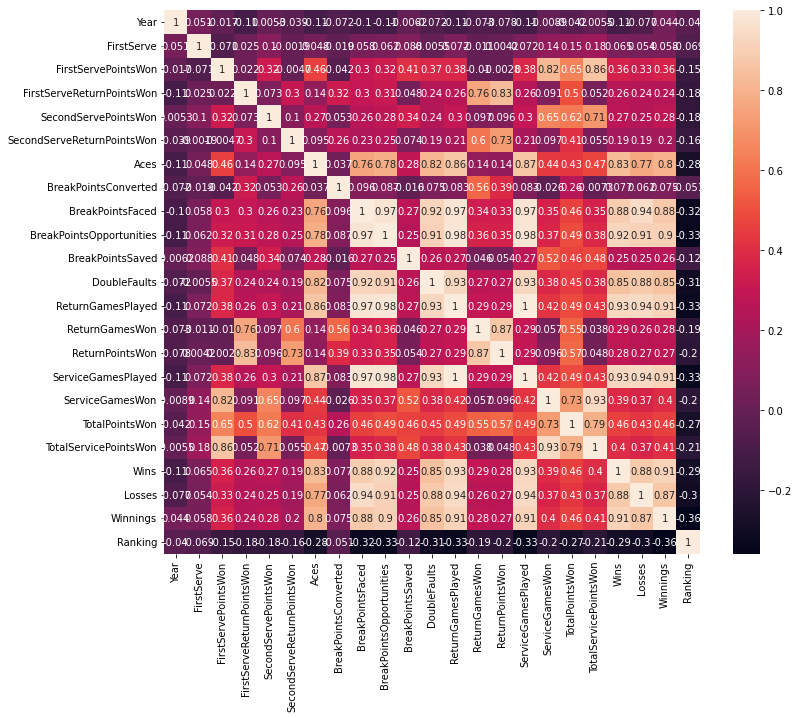

In [22]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax, annot=True);

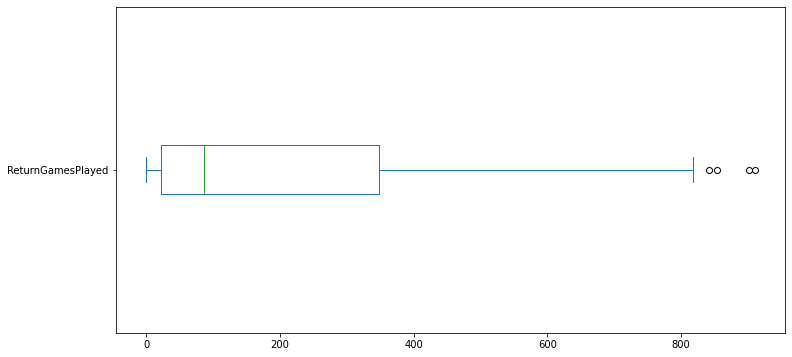

In [104]:
# View distribution of Return Games Played
df.ReturnGamesPlayed.plot(kind='box', figsize=(12, 6), vert=False);

### Linear Regression with one variable

In [114]:
X = df[['ReturnGamesPlayed']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
regr_feat1 = LinearRegression().fit(x_train, y_train)

In [116]:
regr_feat1.score(x_test, y_test)

0.8236756869088456

In [50]:
y_pred_feat1 = regr.predict(x_test)

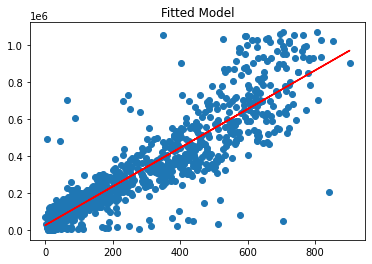

In [123]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr_feat1.predict(x_train), 'r')
plt.title('Fitted Model');

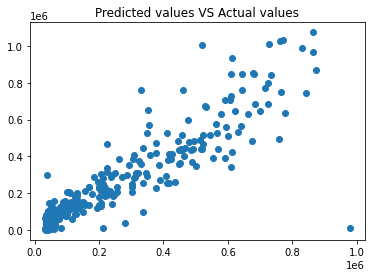

In [122]:
plt.scatter(y_pred_feat1, y_test)
plt.title('Predicted values VS Actual values');

In [124]:
X = df[['Aces']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
regr_feat2 = LinearRegression().fit(x_train, y_train)

In [126]:
y_pred_feat2 = regr_feat2.predict(x_test)

print('R_2 Score: ', regr_feat2.score(x_test, y_test))

R_2 Score:  0.5936012480576555


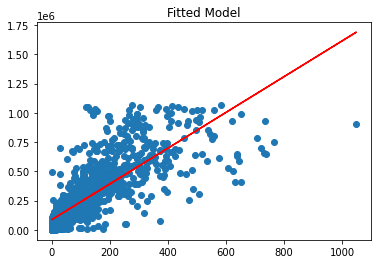

In [127]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr_feat2.predict(x_train), 'r')
plt.title('Fitted Model');

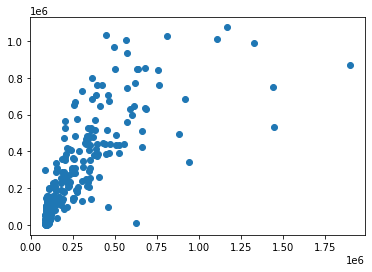

In [128]:
plt.scatter(y_pred_feat2, y_test);

### Linear Regression with Multiple variables

In [130]:
# Select high correlated features
predictor_cols = df.corr().Winnings[df.corr().Winnings > 0.5].index.to_list()

In [131]:
X = (df[predictor_cols] 
     # Drop mulitcolinear features and target feature
     .drop(columns=['Winnings', 'BreakPointsOpportunities', 'DoubleFaults', 'Losses', 'ServiceGamesPlayed', 'Wins']))
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

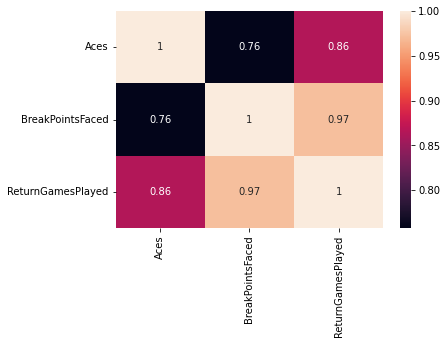

In [132]:
sns.heatmap(X.corr(), annot=True); # using these features regardless of their high correlation pairwise

In [135]:
regr_feat3 = LinearRegression().fit(x_train, y_train)

In [136]:
y_pred_feat3 = regr_feat3.predict(x_test)

print('R_2 Score: ', regr_feat3.score(x_test, y_test)) # these 3 features strongly explain the variation in winnnings

R_2 Score:  0.8183721228866794


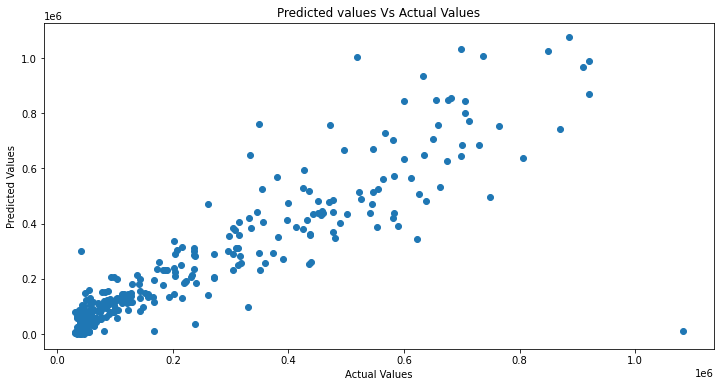

In [139]:
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_feat3, y_test)
plt.title('Predicted values Vs Actual Values')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values');

In [137]:
regr_feat3.coef_

array([-185.64421715, -843.64672607, 1589.84071151])

### Communicate Results

#### Features that lead to a better winning outcome:

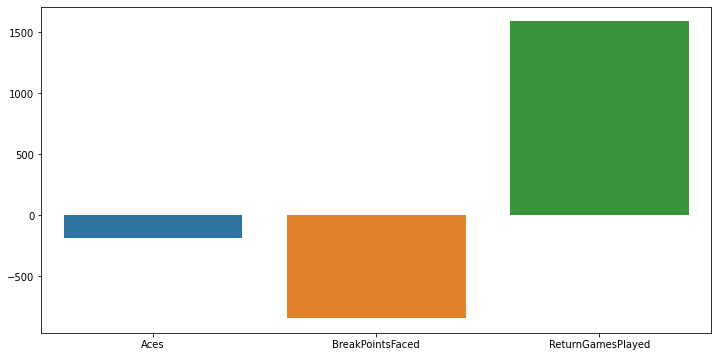

In [153]:
plt.figure(figsize=(12, 6))
sns.barplot(x=x_train.columns, y=regr_feat3.coef_);

In [159]:
df[x_train.columns].head()

,Aces,BreakPointsFaced,ReturnGamesPlayed
0,0,7,9
1,7,7,9
2,2,10,19
3,2,5,14
4,1,2,3


In [168]:
def make_prediction(aces, breakpointsfaced, returngamesplayed):
    data = {
        'Aces':aces,
        'BreakPointsFaced':breakpointsfaced,
        'ReturnGamesPlayed':returngamesplayed
    }
    df = pd.DataFrame(data, index=[0])
    prediction = regr_feat3.predict(df)
    return f"Predicted Winnings Outcome: {round(prediction[0])}"

In [169]:
interact(
    make_prediction,
    aces=IntSlider(
        min=df["Aces"].min(),
        max=df["Aces"].max(),
        value=df["Aces"].mean(),
    ),
    breakpointsfaced=IntSlider(
        min=df["BreakPointsFaced"].min(),
        max=df["BreakPointsFaced"].max(),
        value=df["BreakPointsFaced"].mean(),
    ),
    returngamesplayed=IntSlider(
        min=df["ReturnGamesPlayed"].min(),
        max=df["ReturnGamesPlayed"].max(),
        value=df["ReturnGamesPlayed"].mean())
);

interactive(children=(IntSlider(value=97, description='aces', max=1185), IntSlider(value=112, description='bre…